In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
PATH="../../data/"
origin_df = pd.read_csv(PATH+"train_data.csv")

In [3]:
df = origin_df.copy()
df["first_3"]=df["assessmentItemID"].apply(lambda x:x[1:4])
df["mid_3"]=df["assessmentItemID"].apply(lambda x:x[4:7])
df["last_3"]=df["assessmentItemID"].apply(lambda x:x[7:])
df["dt_Timestamp"]=pd.to_datetime(df["Timestamp"],infer_datetime_format=True)
df["month"]=df["dt_Timestamp"].dt.month
df["hour"]=df["dt_Timestamp"].dt.hour
df.head()

userID assessmentItemID      testId  answerCode            Timestamp  \
0       0       A060001001  A060000001           1  2020-03-24 00:17:11   
1       0       A060001002  A060000001           1  2020-03-24 00:17:14   
2       0       A060001003  A060000001           1  2020-03-24 00:17:22   
3       0       A060001004  A060000001           1  2020-03-24 00:17:29   
4       0       A060001005  A060000001           1  2020-03-24 00:17:36   

   KnowledgeTag first_3 mid_3 last_3        dt_Timestamp  month  hour  
0          7224     060   001    001 2020-03-24 00:17:11      3     0  
1          7225     060   001    002 2020-03-24 00:17:14      3     0  
2          7225     060   001    003 2020-03-24 00:17:22      3     0  
3          7225     060   001    004 2020-03-24 00:17:29      3     0  
4          7225     060   001    005 2020-03-24 00:17:36      3     0

In [4]:
# groupby data
user = df.groupby("userID")["answerCode"].agg(["count","sum","mean"])
item = df.groupby("assessmentItemID")["answerCode"].agg(["count","sum","mean"])
test = df.groupby("testId")["answerCode"].agg(["count","sum","mean"])
tag = df.groupby("KnowledgeTag")["answerCode"].agg(["count","sum","mean"])
month = df.groupby("month")["answerCode"].agg(["count","sum","mean"])
hour = df.groupby("hour")["answerCode"].agg(["count","sum","mean"])

user.columns = ["user_count","user_sum","user_mean"]
item.columns = ["item_count","item_sum","item_mean"]
test.columns = ["test_count","test_sum","test_mean"]
tag.columns = ["tag_count","tag_sum","tag_mean"]
month.columns = ["month_count","month_sum","month_mean"]
hour.columns = ["hour_count","hour_sum","hour_mean"]

df=pd.merge(df,user,how="left",on="userID")
df=pd.merge(df,item,how="left",on="assessmentItemID")
df=pd.merge(df,test,how="left",on="testId")
df=pd.merge(df,tag,how="left",on="KnowledgeTag")
df=pd.merge(df,month,how="left",on="month")
df=pd.merge(df,hour,how="left",on="hour")
df=df.drop(["assessmentItemID","testId","Timestamp","dt_Timestamp"],axis=1)
df.head()

userID  answerCode  KnowledgeTag first_3 mid_3 last_3  month  hour  \
0       0           1          7224     060   001    001      3     0   
1       0           1          7225     060   001    002      3     0   
2       0           1          7225     060   001    003      3     0   
3       0           1          7225     060   001    004      3     0   
4       0           1          7225     060   001    005      3     0   

   user_count  user_sum  ...  test_mean  tag_count  tag_sum  tag_mean  \
0         745       470  ...   0.947683        667      637  0.955022   
1         745       470  ...   0.947683       3329     3040  0.913187   
2         745       470  ...   0.947683       3329     3040  0.913187   
3         745       470  ...   0.947683       3329     3040  0.913187   
4         745       470  ...   0.947683       3329     3040  0.913187   

   month_count  month_sum  month_mean  hour_count  hour_sum  hour_mean  
0       174482     119109    0.682643      101137     65683   0.649446  
1       174482     119109    0.682643      101137     65683   0.649446  
2       174482     119109    0.682643      101137     65683   0.649446  
3       174482     119109    0.682643      101137     65683   0.649446  
4       174482     119109    0.682643      101137     65683   0.649446  

[5 rows x 26 columns]

/tmp/ipykernel_95468/2472994580.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


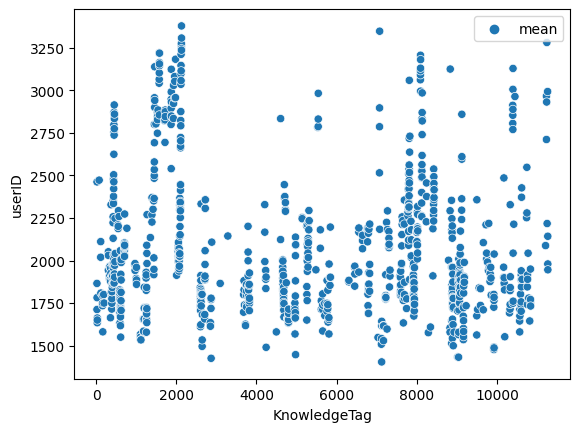

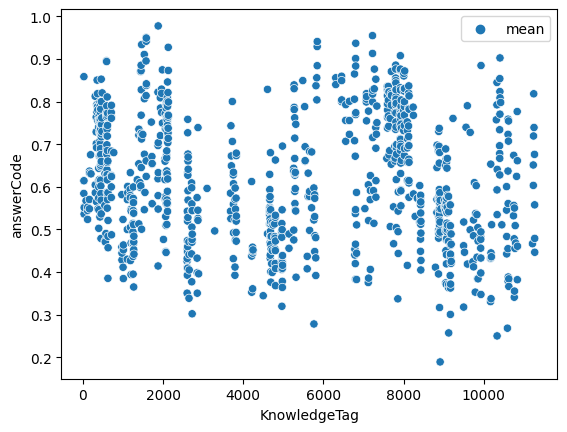

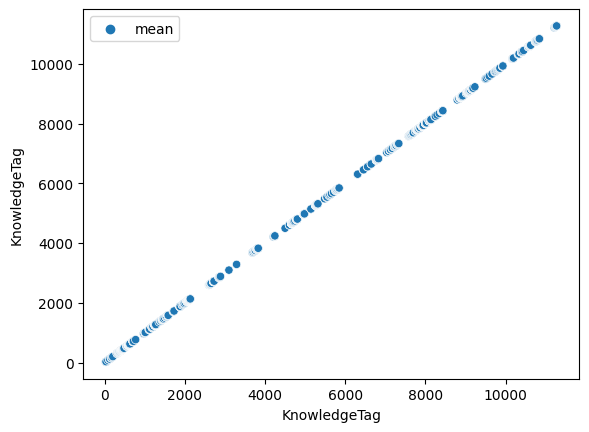

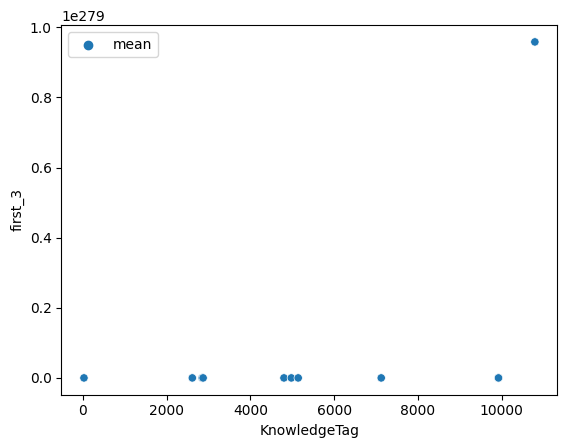

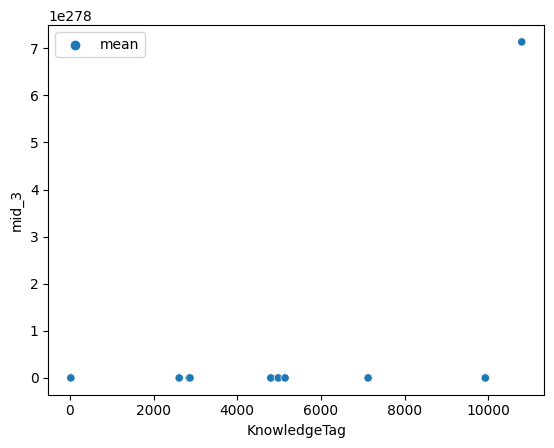

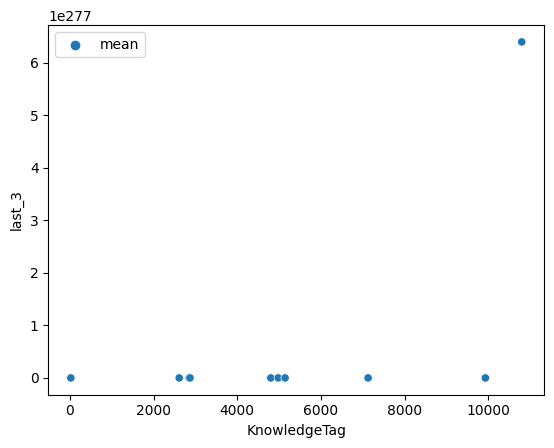

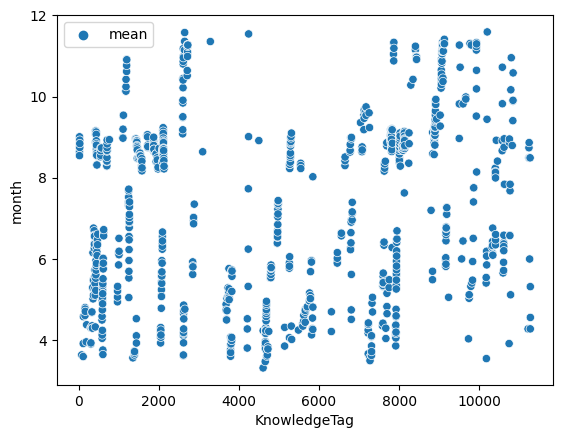

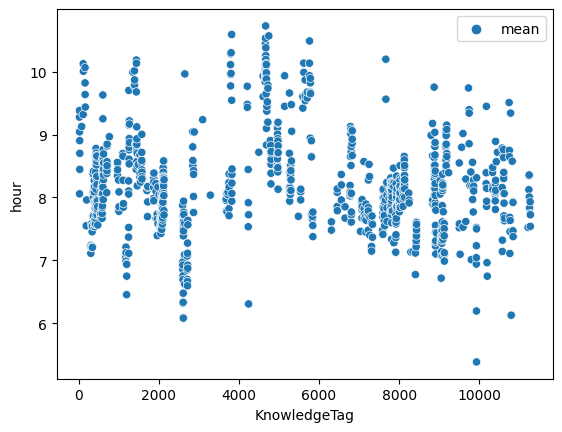

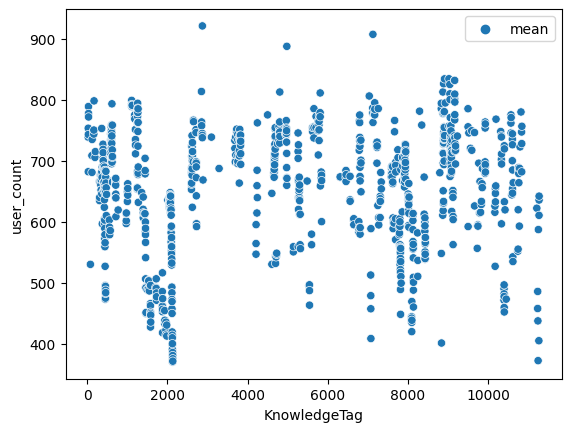

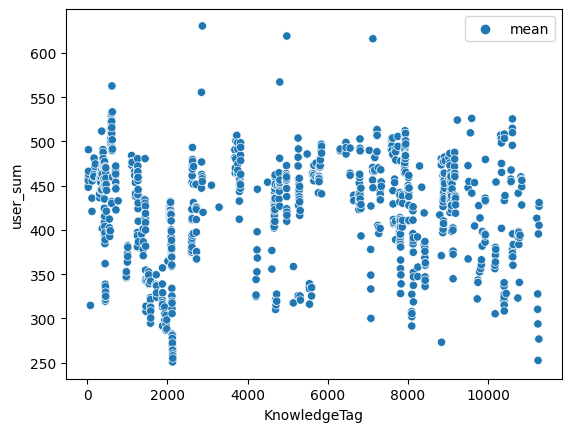

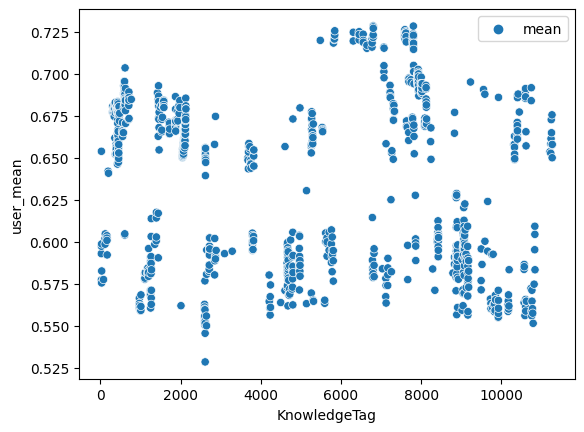

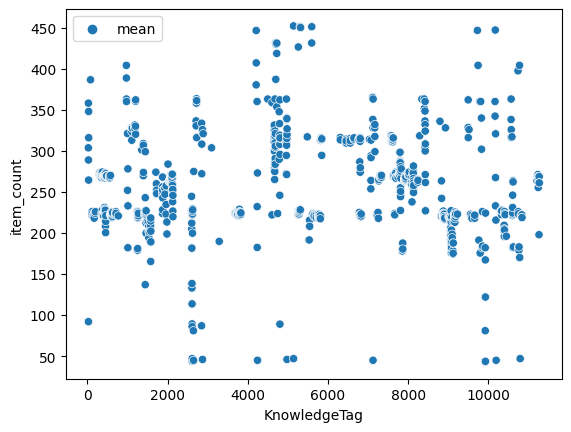

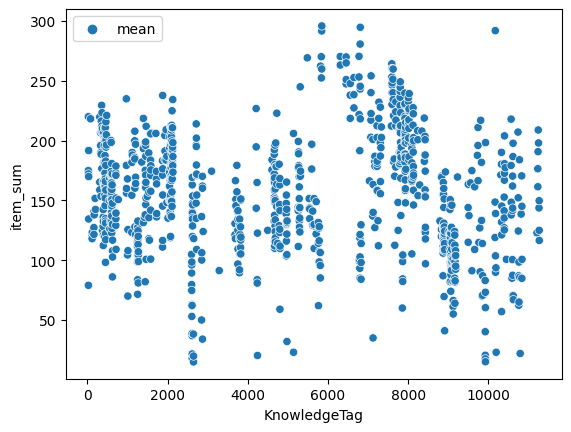

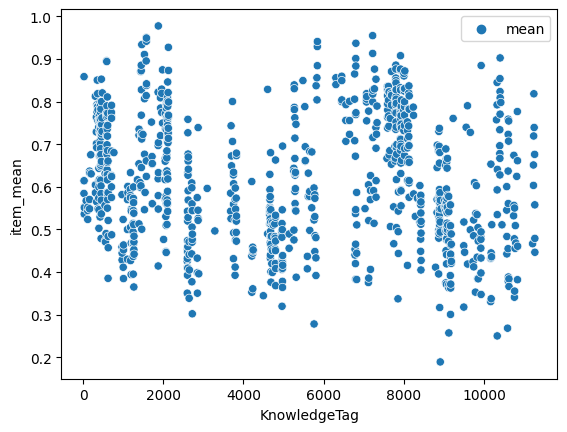

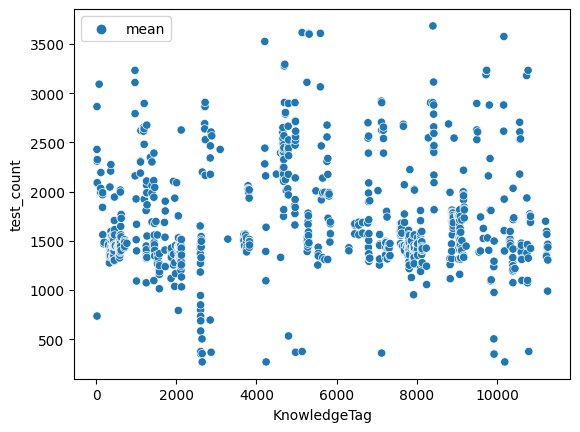

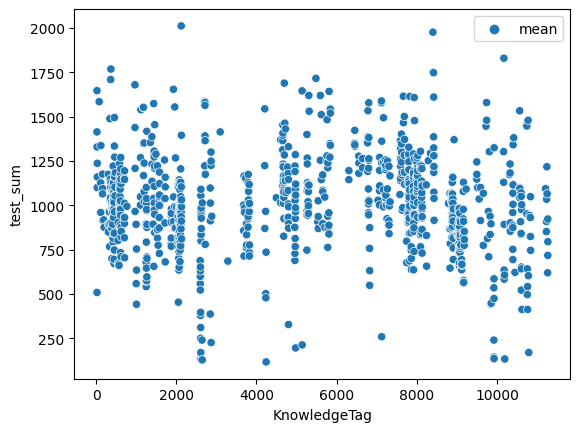

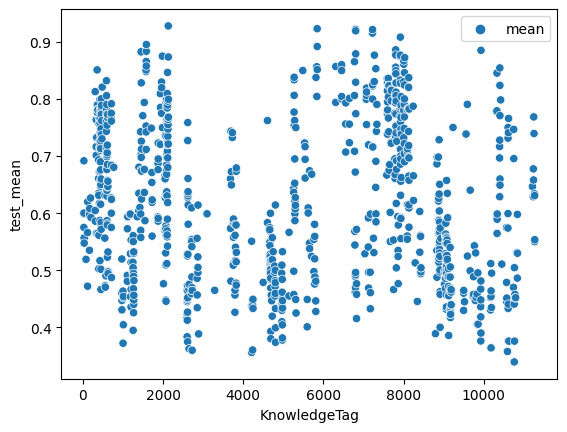

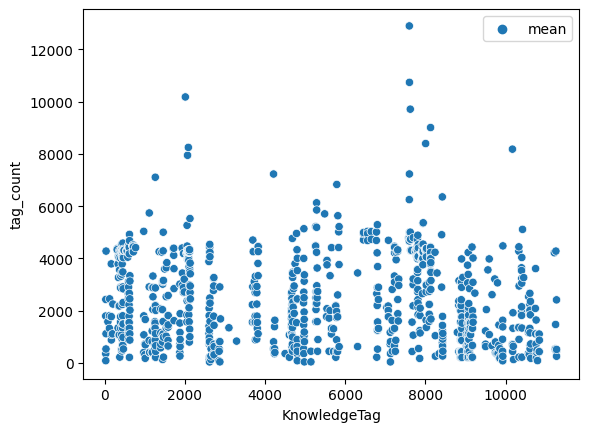

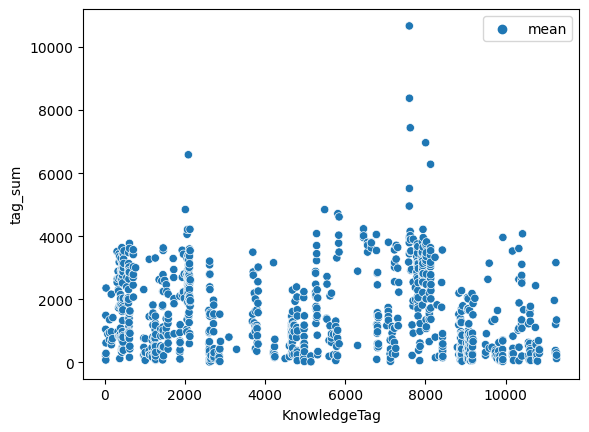

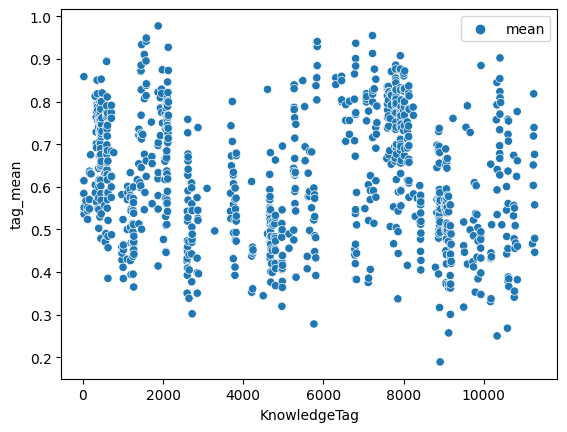

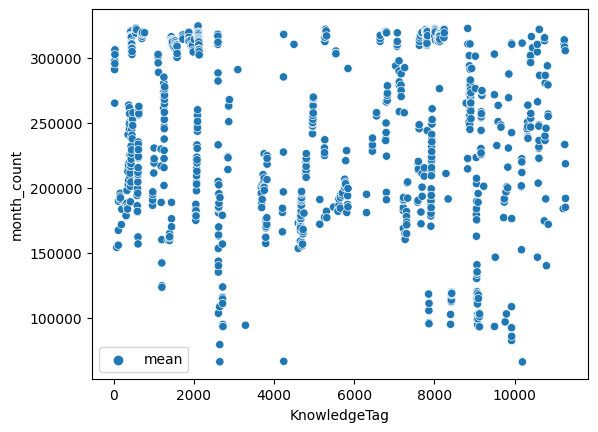

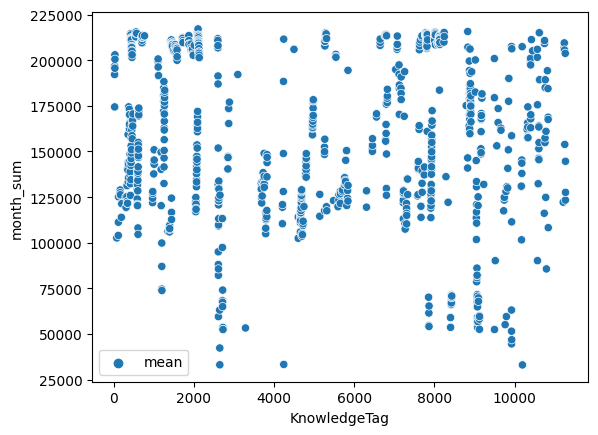

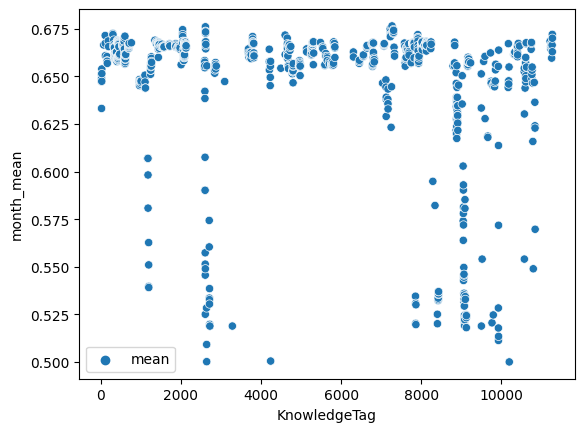

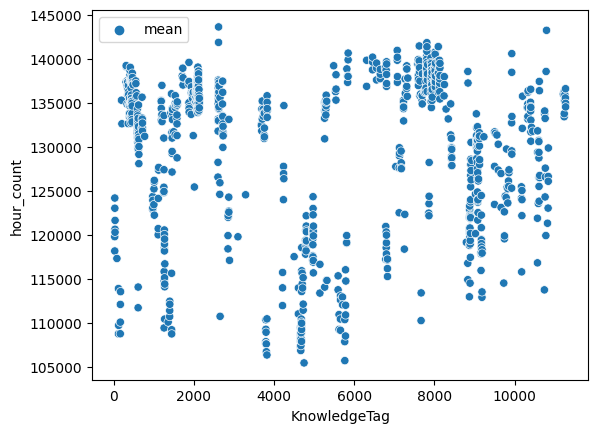

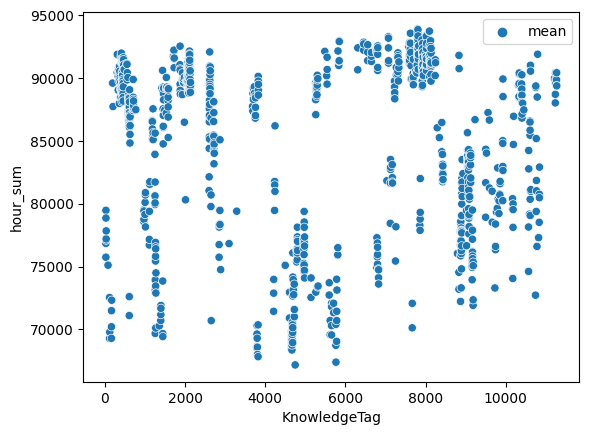

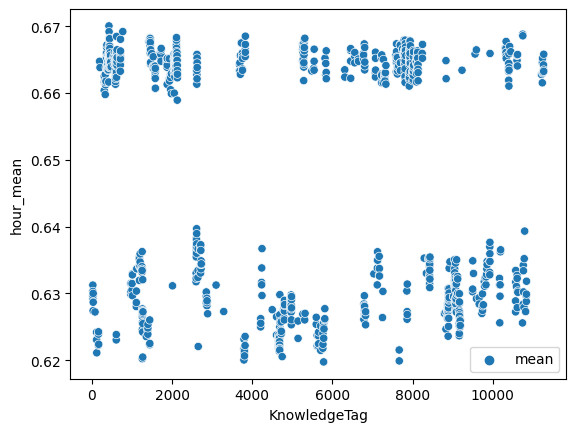

In [5]:
ccolumns = df.columns
for col in ccolumns:
    fig = plt.figure()
    new_df = df.groupby("KnowledgeTag")[col].agg(["mean"])
    sns.scatterplot(data=new_df).set(ylabel=col)


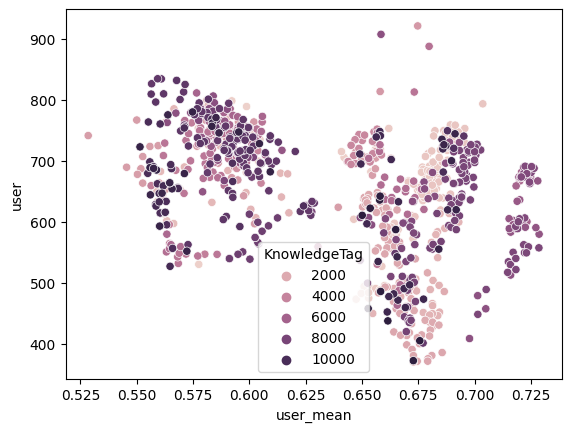

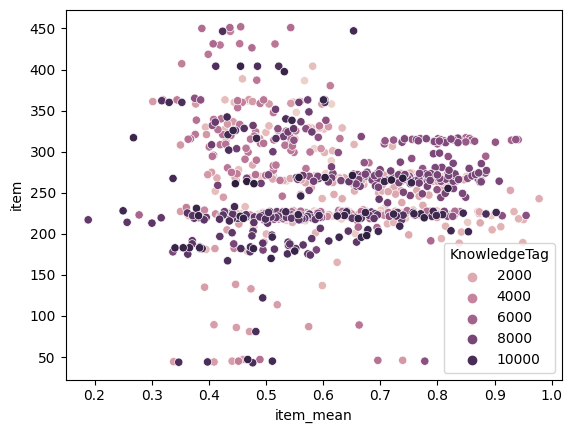

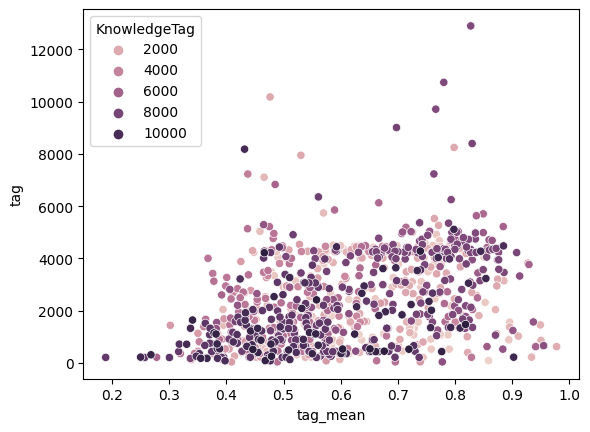

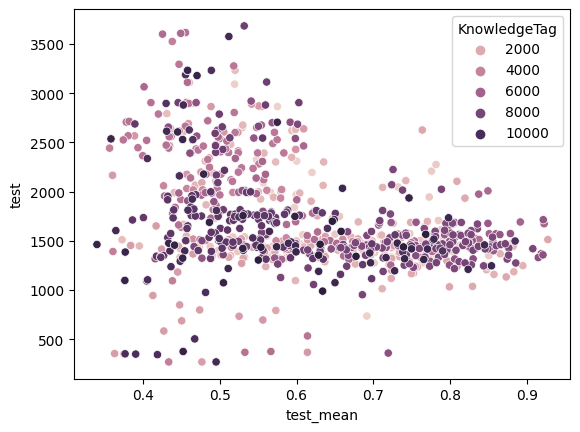

In [6]:
ccolumns = df.columns
for col in ["user","item","tag","test"]:
    fig = plt.figure()
    x=col+"_mean"
    y=col+"_count"
    new_df = df.groupby("KnowledgeTag").agg({
        x:"mean",
        y:"mean",
    })
    sns.scatterplot(x=x,y=y,hue="KnowledgeTag",data=new_df).set(ylabel=col)


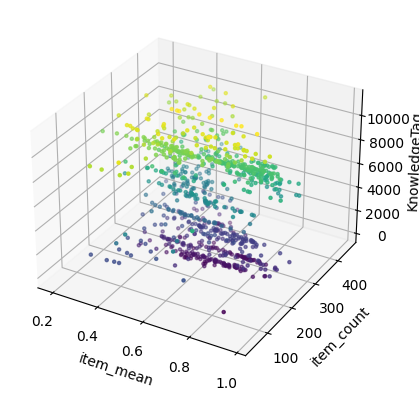

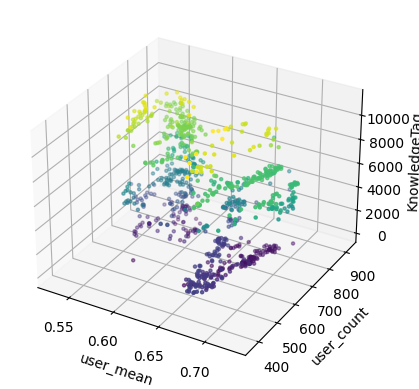

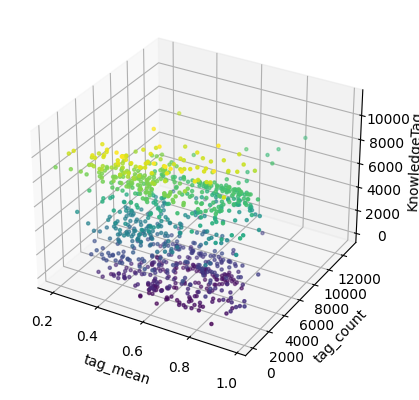

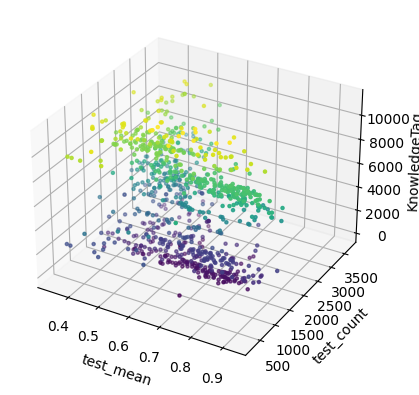

In [7]:
def plot_3d(df,col):
    fig=plt.figure()
    ax=fig.add_subplot(projection='3d')

    x_name=col+"_mean"
    y_name=col+"_count"
    z_name="KnowledgeTag"
    
    data=df.groupby(z_name).agg({
        x_name:"mean",
        y_name:"mean",
    })
    data.columns=[x_name,y_name]
    data[z_name]=data.index
    x=data[x_name]
    y=data[y_name]
    z=data[z_name]

    t=z.values
    color = (t - t.min()) / (t.max() - t.min())
    ax.scatter(x,y,z,marker='.',c=color*256)
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.set_zlabel(z_name)

    plt.show()

plot_3d(df=df,col="item")
plot_3d(df=df,col="user")
plot_3d(df=df,col="tag")
plot_3d(df=df,col="test")

In [8]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
tag_data = df.groupby("KnowledgeTag").agg({
    "user_count":"mean",
    "user_mean":"mean"
})
tag_data.columns = ["user_count","user_mean"]
tag_data["KnowledgeTag"]=tag_data.index
tag_data

user_count  user_mean  KnowledgeTag
KnowledgeTag                                     
23            738.855556   0.592974            23
24            753.427374   0.577312            24
25            682.152174   0.653916            25
26            743.148438   0.597383            26
30            789.033395   0.598760            30
...                  ...        ...           ...
11253         587.244045   0.664952         11253
11265         405.028634   0.675625         11265
11269         610.597021   0.650074         11269
11270         635.716475   0.657830         11270
11271         642.080460   0.658017         11271

[912 rows x 3 columns]

In [9]:
def clustering(
    items,
    n_clusters=9, 
    init='k-means++', 
    max_iter=300, 
    random_state=42
):
    kmeans = KMeans()
    kmeans.fit(items)
    return kmeans.labels_

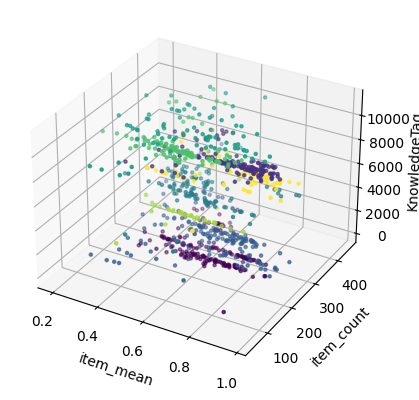

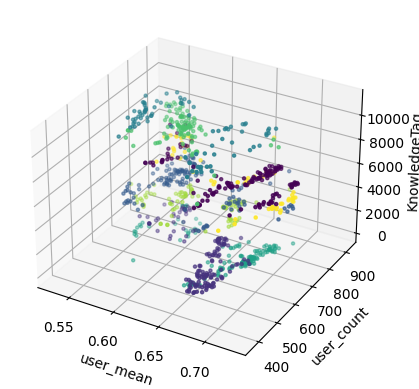

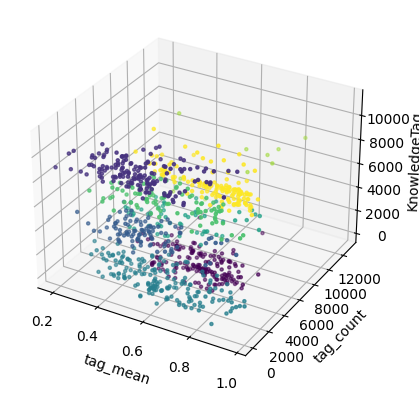

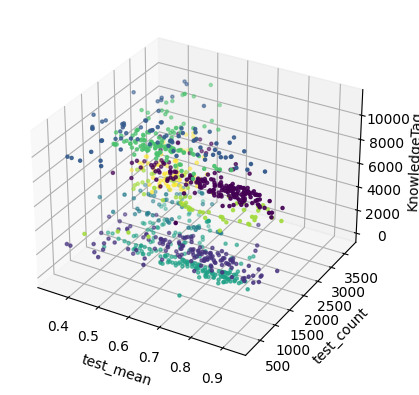

In [10]:
def plot_clustering(df,col):
    fig=plt.figure()
    ax=fig.add_subplot(projection='3d')

    x_name=col+"_mean"
    y_name=col+"_count"
    z_name="KnowledgeTag"
    
    data=df.groupby(z_name).agg({
        x_name:"mean",
        y_name:"mean",
    })
    data.columns=[x_name,y_name]
    data[z_name]=data.index
    x=data[x_name]
    y=data[y_name]
    z=data[z_name]
    
    ax.scatter(x,y,z,marker='.',c=clustering(data))
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.set_zlabel(z_name)

    plt.show()

plot_clustering(df=df,col="item")
plot_clustering(df=df,col="user")
plot_clustering(df=df,col="tag")
plot_clustering(df=df,col="test")

In [11]:
def clustering_items(df,col):
    x_name=col+"_mean"
    y_name=col+"_count"
    z_name="KnowledgeTag"
    
    data=df.groupby(z_name).agg({
        x_name:"mean",
        y_name:"mean",
    })
    data.columns=[x_name,y_name]
    data[z_name]=data.index
    x=data[x_name]
    y=data[y_name]
    z=data[z_name]
    data['clustring']=clustering(data)
    return data

tag_with_test = clustering_items(df=df,col="test")

<AxesSubplot: xlabel='KnowledgeTag'>

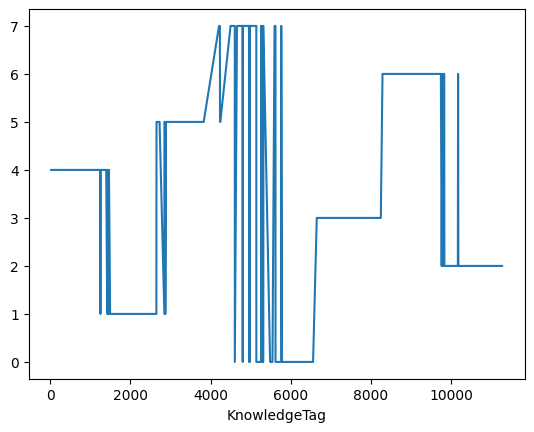

In [12]:
tag_with_test["clustring"].plot()

In [13]:
df.head()

userID  answerCode  KnowledgeTag first_3 mid_3 last_3  month  hour  \
0       0           1          7224     060   001    001      3     0   
1       0           1          7225     060   001    002      3     0   
2       0           1          7225     060   001    003      3     0   
3       0           1          7225     060   001    004      3     0   
4       0           1          7225     060   001    005      3     0   

   user_count  user_sum  ...  test_mean  tag_count  tag_sum  tag_mean  \
0         745       470  ...   0.947683        667      637  0.955022   
1         745       470  ...   0.947683       3329     3040  0.913187   
2         745       470  ...   0.947683       3329     3040  0.913187   
3         745       470  ...   0.947683       3329     3040  0.913187   
4         745       470  ...   0.947683       3329     3040  0.913187   

   month_count  month_sum  month_mean  hour_count  hour_sum  hour_mean  
0       174482     119109    0.682643      101137     65683   0.649446  
1       174482     119109    0.682643      101137     65683   0.649446  
2       174482     119109    0.682643      101137     65683   0.649446  
3       174482     119109    0.682643      101137     65683   0.649446  
4       174482     119109    0.682643      101137     65683   0.649446  

[5 rows x 26 columns]

In [14]:
knowledge_f3_df = df[["KnowledgeTag","first_3"]]

In [15]:
knowledge_f3_df

KnowledgeTag first_3
0                7224     060
1                7225     060
2                7225     060
3                7225     060
4                7225     060
...               ...     ...
2266581           438     030
2266582          8836     040
2266583          8836     040
2266584          8836     040
2266585          8836     040

[2266586 rows x 2 columns]

In [16]:
temp=knowledge_f3_df.groupby("KnowledgeTag")["first_3"].unique().reset_index()
temp['first_3']=temp['first_3'].apply(lambda x:int(x[0][1]))

In [17]:
temp

KnowledgeTag  first_3
0              23        8
1              24        8
2              25        8
3              26        8
4              30        8
..            ...      ...
907         11253        4
908         11265        4
909         11269        4
910         11270        4
911         11271        4

[912 rows x 2 columns]

In [18]:
rate_tag_f3 = df[["KnowledgeTag","first_3","answerCode"]]
rate_tag_f3

KnowledgeTag first_3  answerCode
0                7224     060           1
1                7225     060           1
2                7225     060           1
3                7225     060           1
4                7225     060           1
...               ...     ...         ...
2266581           438     030           0
2266582          8836     040           1
2266583          8836     040           1
2266584          8836     040           1
2266585          8836     040           1

[2266586 rows x 3 columns]

In [19]:
rtf3 = rate_tag_f3.groupby(["KnowledgeTag","first_3"])["answerCode"].agg("mean").reset_index()

In [20]:
rtf3

KnowledgeTag first_3  answerCode
0              23     080    0.584444
1              24     080    0.614525
2              25     080    0.858696
3              26     080    0.614309
4              30     080    0.536178
..            ...     ...         ...
908         11253     040    0.739374
909         11265     040    0.676211
910         11269     040    0.557716
911         11270     040    0.478927
912         11271     040    0.446360

[913 rows x 3 columns]

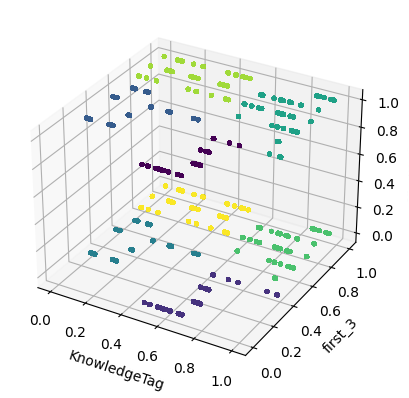

In [21]:
"""
n_clusters=9, init='k-means++', max_iter=300, random_state=42
"""
def plot3d_items(
        data,
        x_name,
        y_name,
        z_name,
        do_clustering=False,
        n_clusters=9, 
        init='k-means++', 
        max_iter=300, 
        random_state=42
    ):
    fig=plt.figure()
    ax=fig.add_subplot(projection='3d')

    # normalized_df=(df-df.min())/(df.max()-df.min())
    _data=data.copy()

    _x=data[x_name].astype(float)
    x=_data[x_name] = (_x-_x.min())/(_x.max()-_x.min())

    _y=data[y_name].astype(float)
    y=_data[y_name] = (_y-_y.min())/(_y.max()-_y.min())

    _z=data[z_name].astype(float)
    z=_data[z_name] = (_z-_z.min())/(_z.max()-_z.min())
    if do_clustering:
        clust = clustering(
            _data[[x_name,y_name,z_name]],
            n_clusters=n_clusters, 
            init=init, 
            max_iter=max_iter, 
            random_state=random_state
        )
    else:
        clust=None

    ax.scatter(x,y,z,marker='.',c=clust)
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.set_zlabel(z_name)
    plt.show()
plot3d_items(df,"KnowledgeTag","first_3","answerCode", n_clusters=8, do_clustering=True)